# pythonについて
- 文法が簡単で学びやすく、初学者でも扱いやすい  
- 豊富なライブラリで、データ解析・機械学習・Web開発・可視化など幅広く活用可能  
- プラットフォームを問わず動作し、研究開発や業務効率化に最適  
- 大規模なコミュニティがあり、情報やサポートが充実  
- 少ないコードでプロトタイピングや自動化が可能で、応用範囲が非常に広い

上記のような理由から、近年ではpythonを使う人が非常に多くなっています。そこで本講座では、数あるプログラム言語の中からpythonにフォーカスして勉強を進めていきます。
<br>初めにpythonの凄さを皆さんに実感していただこうと思います。コードの内容は理解できなくて大丈夫です。実際にコードが動くところを体感してみてください。

## 例１：化学構造の描写
pythonを使えば化学構造の描写が可能です。

In [19]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import AllChem
import py3Dmol

In [28]:
# 水の SMILES
smiles = "O"

# SMILESから分子を生成（水素を付加）
mol = Chem.AddHs(Chem.MolFromSmiles(smiles))

# 3D構造を生成して最適化
AllChem.EmbedMolecule(mol)
AllChem.UFFOptimizeMolecule(mol)

# py3Dmolで3D表示
view_mol = py3Dmol.view(width=400, height=400)
view_mol.addModel(Chem.MolToMolBlock(mol), 'mol')  # MolBlock形式で追加
view_mol.setStyle({'sphere': {}})  # 球で表示
view_mol.zoomTo()
view_mol.show()

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [31]:
# ベンゼンの SMILES
smiles = "c1ccccc1"

# SMILESから分子を生成（水素を付加）
mol = Chem.AddHs(Chem.MolFromSmiles(smiles))

# 3D構造を生成して最適化
AllChem.EmbedMolecule(mol)
AllChem.UFFOptimizeMolecule(mol)

# py3Dmolで3D表示
view_mol = py3Dmol.view(width=400, height=400)
view_mol.addModel(Chem.MolToMolBlock(mol), 'mol')  # MolBlock形式で追加
view_mol.setStyle({'stick': {}})  # スティック表示
view_mol.zoomTo()
view_mol.show()

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

## 例２：機械学習
pythonを使えば、以下のように機械学習を簡単に実行できます。アヤメの花のデータを元に実演していきます。

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.datasets import load_iris
import pandas as pd
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
# データ読み込み
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

# データをDataFrameに変換（可視化しやすくするため）
df = pd.DataFrame(X, columns=feature_names)
df['species'] = [target_names[i] for i in y]
print(df.shape)
df.head(5)

(150, 5)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


アヤメの花には「セットサ」「バージカラー」「バージニカ」という3つの種類があります。それぞれの花は、がく片の長さ・幅や花びらの長さ・幅といった特徴を持っています。
<br>今回のデータには、150本のアヤメの花について、これらの特徴と種類が記録されています。これを使って、「どの花がどの種類か」を自動で判別するコンピューターのモデルを作ります。
<br>初めに、pythonを使ってデータの中身を詳しく見ていきます。pythonを使えば、非常に短いコードでたくさんのグラフを描画することが可能です。

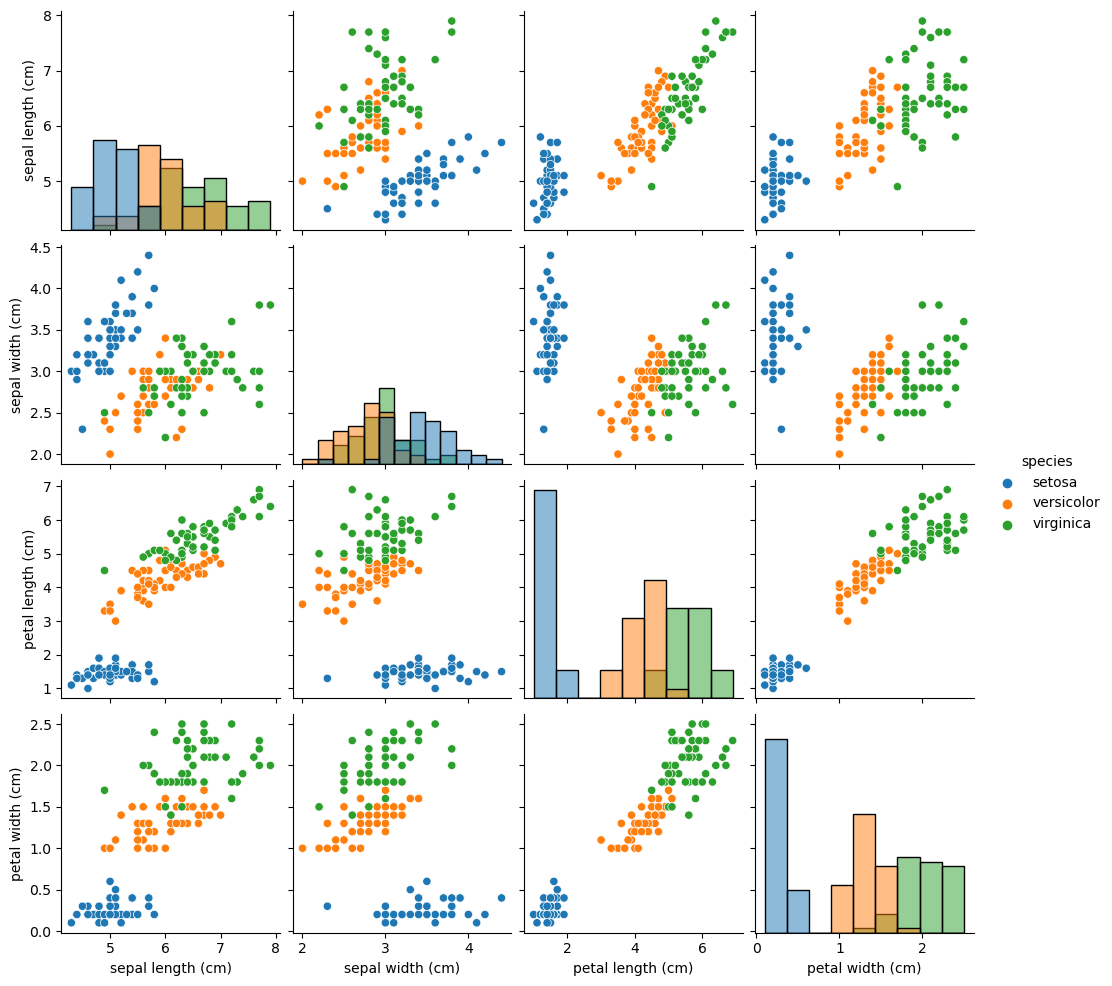

In [3]:
# データ可視化
sns.pairplot(df, hue='species', diag_kind='hist')
plt.show()

以下のコードでロジスティック回帰という手法を用いた機械学習による分類モデルの作成を行います。
これだけのコードで機械学習を使えるのがpythonの魅力です！

In [10]:
# 訓練データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 特徴量の標準化
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ロジスティック回帰で分類
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# 予測
y_pred = model.predict(X_test_scaled)

In [11]:
# 正答率を計算
accuracy = accuracy_score(y_test, y_pred)
print(f'正答率: {accuracy:.2f}')  # 小数第2位まで表示

正答率: 0.93


今回のモデルでは正答率93%でした！

混同行列
[[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]


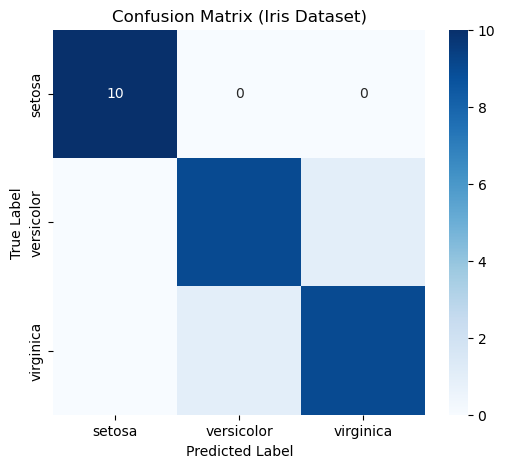

In [12]:
# ヒートマップ表示
cm = confusion_matrix(y_test, y_pred)
print('混同行列')
print(cm)

plt.figure(figsize=(6, 5))
ax = sns.heatmap(
    cm, 
    annot=True,      # 数字を表示
    fmt='d',         # 整数表示
    cmap='Blues', 
    xticklabels=target_names,  # 予測ラベル
    yticklabels=target_names   # 正解ラベル
)

# タイトル・軸ラベルを設定
ax.set_title('Confusion Matrix (Iris Dataset)')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')

plt.show()

以上のように、pythonを使えば簡単に機械学習を実行可能です。使いこなせれば、今回使用するような温度制御のプログラムも作成できます。
<br>上記は難しいかったと思いますが、pythonの有用性を十分なほど示せたと思います。これよりpythonの基礎からお勉強を始めていきます。

# 1.1 変数
変数とは、文字や数値などのデータを入れておける箱です。プログラム内で何らかのデータを使いたい時に、そのデータに名前をつけて操作することができます。<br>Pythonでは変数にデータを代入することで変数を作成できます。変数の中身はprint()で表示できます。実行してみましょう。

In [52]:
# 変数の作成と代入  
message = "こんにちは、Python!"  
number = 100  
pi = 3.14  

In [ ]:
# 変数の中身の確認
print(f"message：{message}")
print(f"number ：{number}")
print(f"pi     ：{pi}")

上記の例では、文字列"こんにちは、Python!"をmessage変数に、整数100をnumber変数に、そして浮動小数点数3.14をpi変数にそれぞれ入れています。

「=」はイコールの意味ではなく、左の変数に右の値を入れることを意味します。

<img src='1.1.png'>
https://www.datamentor.io/python/variables

## 練習１
あなたの名前を変数your_nameに入れ、print()関数で表示してみましょう。

In [ ]:
#レッツトライ！
your_name = "あなたの名前は？"
print(your_name)

# 1.2 変数とメモリ
コンピュータ内部にはにはメモリという部品があり、変数はプログラムが実行される際に、コンピュータのメモリ上に確保される一時的な記憶場所です。<br>変数に格納されるデータ（値）は、メモリの特定の位置に保存されます。

<img src='1.2.png' width="500">
https://www.indiamart.com/proddetail/computer-ram-16331528297.html

# 1.3 Pythonのデータ型
コンピュータサイエンスにおいて、データ型（または単に「型」とも）は、データの種類を意味し、それによってどのようなデータを変数の箱に入れられるか、どのような操作ができるかがきまります。<br>Pythonにはいくつかの基本的なデータ型があります。


整数型（int）<br>浮動小数点型（float）<br>文字列型（str）<br>ブール型（bool）<br>リスト（list）<br>タプル（tuple）<br>辞書（dict）


例えば、整数はint、小数点を含む数はfloat、テキストはstrとして扱われます。

In [54]:
# 整数型  
age = 30  
  
# 浮動小数点型  
weight = 65.5  
  
# 文字列型  
name = "Alice"  
  
# ブール型  
is_adult = True  
  
# リスト  
fruits = ["apple", "banana", "cherry"]  
  
# タプル  
coordinates = (10, 20)  
  
# 辞書  
person = {"name": "Bob", "age": 25} 

In [55]:
print(f"整数の型(age)　　　　　  ：{type(age).__name__}")
print(f"小数点を含む数の型(wight)：{type(weight).__name__}")
print(f"テキストの型(name)　　　 ：{type(name).__name__}")

整数の型(age)　　　　　  ：int
小数点を含む数の型(wight)：float
テキストの型(name)　　　 ：str


## 練習２
練習１で作成したyour_nameの型はどうなっているでしょうか？<br>type()を使って確認してみましょう。

In [61]:
#レッツトライ


# 1.4 演算
Pythonの演算には様々なタイプがあり、それぞれ異なるデータ型と操作を扱います。ここでは、数値演算、文字列操作、リスト操作の例を交えて解説します。  
   
### __数値演算__
数値演算では、整数や浮動小数点数の計算を行います。以下は基本的な数値演算の例です。

In [62]:
# 加算  
a = 10  
b = 5  
c = a + b  # cは15  

In [63]:
print(c)

15


In [64]:
# 減算  
d = a - b  # dは5  

print(d)

5


In [65]:
# 乗算  
e = a * b  # eは50 

print(e)

50


In [66]:
# 真の除算  
f = a / b  # fは2.0（浮動小数点数） 

print(f)

2.0


In [67]:
# 整数除算  
g = a // b  # gは2（整数）  

print(g)

2


In [68]:
# 剰余（モジュロ）  
h = a % b  # hは0（10は5で割り切れる） 

print(h)

0


In [69]:
# 指数  
i = a ** b  # iは100000（10の5乗）  

print(i)

100000


## 練習３
上記の数値演算のうち気になるものを試してみましょう！

In [71]:
#例
3+5

8

In [70]:
#レッツトライ


### __文字列操作__  
文字列操作では、文字列を結合したり、部分文字列を抽出したりします。以下は文字列操作の例です。

In [12]:
# 文字列の結合  
str1 = "Hello"  
str2 = "World"  
combined_str = str1 + " " + str2  # "Hello World"  

print(combined_str)

Hello World


In [13]:
# 文字列の繰り返し  
repeated_str = str1 * 3  # "HelloHelloHello"  
   
print(repeated_str)

HelloHelloHello


In [14]:
# 文字列のスライシング  
hello_world = "Hello, World!"  
world = hello_world[7:12]  # "World" (7番目から11番目の文字を取得)  
   
print(world)

World


In [15]:
# 文字列の長さ  
length = len(hello_world)  # 13  
   
print(length)

13


In [16]:
# 文字列の置換  
replaced_str = hello_world.replace("World", "Python")  # "Hello, Python!" 

print(replaced_str)

Hello, Python!


## 練習４
あなたの苗字と名前を足し合わせて氏名を完成させましょう！

In [75]:
#レッツトライ
familyName = "苗字" #苗字を""の間に入れてください。
lastName = "名前" #名前を""の間に入れてください。

your_name = familyName + " " + lastName
print(your_name)

### __リスト操作__
リストは変更可能なシーケンスで、異なるタイプの要素を含むことができます。リストに対するいくつかの演算を見てみましょう。

In [17]:
# リストの作成  
numbers = [1, 2, 3, 4, 5]  

In [18]:
# リストの要素にアクセス  
second_number = numbers[1]  # 2（インデックスは0から始まる）  
   
print(second_number)

2


In [19]:
# リストのスライシング  
first_three = numbers[:3]  # [1, 2, 3]  
   
print(first_three)

[1, 2, 3]


In [20]:
# リストの要素の追加  
numbers.append(6)  # [1, 2, 3, 4, 5, 6]  

print(numbers)

[1, 2, 3, 4, 5, 6]


In [21]:
# リストの結合  
more_numbers = [7, 8, 9]  
combined_list = numbers + more_numbers  # [1, 2, 3, 4, 5, 6, 7, 8, 9]  

print(combined_list)

[1, 2, 3, 4, 5, 6, 7, 8, 9]


In [22]:
# リストの要素をソート  
unsorted_list = [3, 1, 4, 1, 5]  
unsorted_list.sort()  # [1, 1, 3, 4, 5]

print(unsorted_list)

[1, 1, 3, 4, 5]


## 練習５
リストには文字を入れることも可能です。あなたの苗字と名前をリストに入れて、名前を取り出して表示してみましょう。

In [76]:
#レッツトライ
name_list = ["苗字", "名前"]
print(name_list)

['苗字', '名前']


In [ ]:
#レッツトライ
print(name_list[]) #[]の中に名前のインデックス番号を入れてください。

# 1.5 関数 
Pythonの関数は、コードを何度も使える部分に分割するのに役立ちます。関数を使用することで、コードをを整理し、部品化されたものにすることができます。<br>Pythonでは、関数は `def` キーワードを用いて関数を定義します。


以下は、Pythonで最も基本的な関数の一つです。何も引数を取らず、単純に文字列を出力する関数です。     

In [23]:
def greet():  
    print("Hello, World!")  
   
greet()  # 関数を呼び出す 

Hello, World!


### __引数を取る関数__     
関数は引数を取ることができ、これを用いて関数にデータを渡すことができます。 

In [24]:
def greet(name):  
    print(f"Hello, {name}!")  
   
greet("Alice")  # "Hello, Alice!" を出力  
greet("Bob")    # "Hello, Bob!" を出力   

Hello, Alice!
Hello, Bob!


In [30]:
def function_name(parameters):  
    result = parameters + 1
    return result  
  
# 関数を呼び出す  
function_name(1)  

2

## 練習６
greet()関数を使ってあなたの名前を表示してみましょう。
成功すると"Hello, 名前"と表示されます。

In [85]:
#レッツトライ


### __関数のスコープ__  
Pythonでは、関数内で宣言された変数はローカルスコープに属し、関数外からは直接アクセスすることができません。<br>一方で、関数外で宣言された変数はグローバルスコープに属し、プログラム内のどこからでもアクセスすることができます。  

In [25]:
x = "global"  
   
def my_function():  
    y = "local"  
    print("Function inside:", y)  
   
my_function()  # "Function inside: local" を出力  
print("Function outside:", x)  # "Function outside: global" を出力  

Function inside: local
Function outside: global


### __グローバル変数とローカル変数__  
関数内でグローバル変数を扱いたい場合は、`global` キーワードを使用してその変数を宣言する必要があります。  

In [26]:
x = "global"  
   
def my_function():  
    global x  
    x = "modified"  
    print("Function inside:", x)  
   
my_function()  # "Function inside: modified" を出力  
print("Function outside:", x)  # "Function outside: modified" を出力  

Function inside: modified
Function outside: modified


# 1.6 制御構造
 コンピュータサイエンスにおける制御構造は、プログラムの流れを制御するための構造です。これにより、プログラムは入力や計算結果に基づいて異なるルートを取ることができます。<br>ythonにおけるおもな制御構造には条件分岐、繰り返し（ループ）、および関数の呼び出しがあります。


### __条件分岐: if、elif、else__
条件分岐は、特定の条件が真（True）であるかどうかに基づいて、どのコードブロックを実行するかを決定します。Pythonではif文を使ってこの機能を実現しています。

  

In [27]:
# if文の例  
age = 20  
if age >= 18:  
    print("成人です")  
else:  
    print("未成年です")  

成人です


## 練習7
ageにあなたの年齢を入れ、プログラムにあなたが成人かどうか判断してもらいましょう。

In [ ]:
# レッツトライ
#age変数にあなたの年齢を入れてください。  
age =　　
if age >= 18:  
    print("成人です")  
else:  
    print("未成年です")  

### __繰り返し（ループ）: for、while__
繰り返しは、コードのブロックを複数回実行するための構造です。Pythonではforループとwhileループの2つの主要な方法があります。


forループは、コレクション（リスト、タプルなど）やイテレータを通じて繰り返し処理を行います。

whileループは、ある条件が真（True）である間、コードブロックを繰り返し実行します。

In [28]:
# for文の例  
fruits = ["apple", "banana", "cherry"]  
for fruit in fruits:  
    print(fruit)  

apple
banana
cherry


In [29]:
# while文の例  
count = 0  
while count < 5:  
    print(count)  
    count += 1  

0
1
2
3
4


## 練習８
リストにあなたの苗字と名前をいれ、繰り返しを使って苗字と名前を表示してみましょう。

In [87]:
# レッツトライ
name_list = ["苗字", "名前"]



# 1.7 プログラムを使ってできること
この章では、今まで習ったことを使い、プログラムを実際に使ってできることを紹介します。

### ①おみくじプログラム
まず初めに、おみくじのプログラムを紹介します。実行すると大吉から凶までの中からランダムに結果が表示されます。

In [88]:
import random

def omikuji():
    results = ["大吉", "中吉", "小吉", "吉", "末吉", "凶"]
    choice = random.choice(results)
    return choice

# 実行例
print("おみくじを引きます！")
print("結果は・・・", omikuji())

おみくじを引きます！
結果は・・・ 吉


### __②化学への応用__
近年、情報科学の発展に伴い、科学者もシミュレーション技術を活用しています。
最初の例で示したように、pythonを使うことで簡単な構造式の化合物を表示可能です。
<br>本講義の最後に、焼きいもの甘さの元となるマルトース、および酵素（アミラーゼ）の構造を可視化してみましょう！

In [14]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import AllChem
import py3Dmol

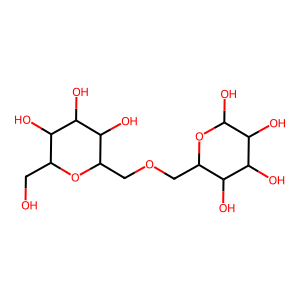

In [34]:
# マルトースの SMILES
smiles = "C(C1C(C(C(C(O1)O)O)O)O)OCC2C(C(C(C(O2)CO)O)O)O"

# 分子オブジェクトを作成
mol = Chem.MolFromSmiles(smiles)

# 分子を描画
Draw.MolToImage(mol)

In [35]:
# SMILESから分子を生成（水素を付加）
mol = Chem.AddHs(Chem.MolFromSmiles(smiles))

# 3D構造を生成して最適化
AllChem.EmbedMolecule(mol)
AllChem.UFFOptimizeMolecule(mol)

# py3Dmolで3D表示
view_mol = py3Dmol.view(width=600, height=600)
view_mol.addModel(Chem.MolToMolBlock(mol), 'mol')  # MolBlock形式で追加
view_mol.setStyle({'stick': {}})  # スティック表示
view_mol.zoomTo()
view_mol.show()

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [32]:
# PDBファイル読み込み
pdb = open("5wqs.pdb").read()  

# 左寄せしてNotebookに表示
view_enz = py3Dmol.view(width=600, height=600)
view_enz.addModel(pdb,'pdb')
view_enz.setStyle({'cartoon':{'color':'spectrum'}})
view_enz.zoomTo()
view_enz.show()

3Dmol.js failed to load for some reason. Please check your browser console for error messages.